In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-9364007-0003.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-1135262-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-9476607-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-2831144-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-7720431-0003.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-1514320-0002.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-6950003-0003.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-874167-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-4276353-0001.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-9857270-0004.jpeg
/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-3565661-000

In [2]:
import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

In [3]:
IMG_SIZE = 224
BATCH = 32
SEED = 42

In [4]:
#BATCH

In [5]:
main_path = "../input/labeled-chest-xray-images/chest_xray"

train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

In [6]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [7]:
df_train

,class,image
0,Normal,../input/labeled-chest-xray-images/chest_xray/train/NORMAL/NORMAL-705219-0001.jpeg
1,Normal,../input/labeled-chest-xray-images/chest_xray/train/NORMAL/NORMAL-9031828-0001.jpeg
2,Normal,../input/labeled-chest-xray-images/chest_xray/train/NORMAL/NORMAL-9211217-0001.jpeg
3,Normal,../input/labeled-chest-xray-images/chest_xray/train/NORMAL/NORMAL-8050432-0001.jpeg
4,Normal,../input/labeled-chest-xray-images/chest_xray/train/NORMAL/NORMAL-6897353-0001.jpeg
...,...,...
5227,Pneumonia,../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-3852742-0001.jpeg
5228,Pneumonia,../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-4313165-0003.jpeg
5229,Pneumonia,../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-6518955-0001.jpeg
5230,Pneumonia,../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-3076396-0001.jpeg


In [8]:
df_test

,class,image
0,Normal,../input/labeled-chest-xray-images/chest_xray/test/NORMAL/NORMAL-6293151-0001.jpeg
1,Normal,../input/labeled-chest-xray-images/chest_xray/test/NORMAL/NORMAL-4315572-0001.jpeg
2,Normal,../input/labeled-chest-xray-images/chest_xray/test/NORMAL/NORMAL-5893138-0001.jpeg
3,Normal,../input/labeled-chest-xray-images/chest_xray/test/NORMAL/NORMAL-7225301-0001.jpeg
4,Normal,../input/labeled-chest-xray-images/chest_xray/test/NORMAL/NORMAL-1627110-0001.jpeg
...,...,...
619,Pneumonia,../input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-5754167-0001.jpeg
620,Pneumonia,../input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-8983865-0002.jpeg
621,Pneumonia,../input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-6831597-0001.jpeg
622,Pneumonia,../input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-2040583-0002.jpeg


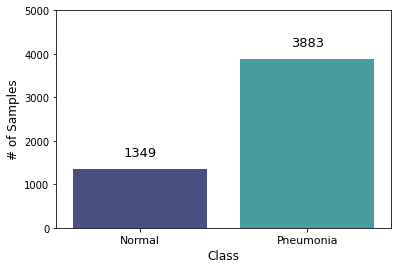

In [9]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)
    
plt.show()

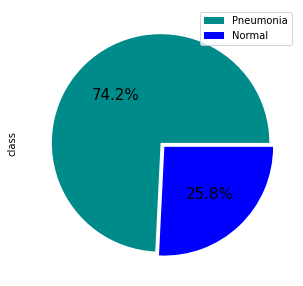

In [10]:
plt.figure(figsize=(7,5))

df_train['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

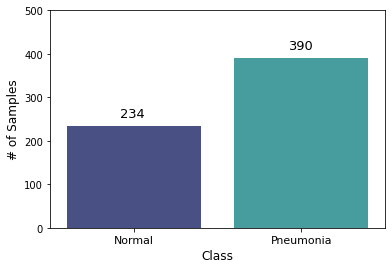

In [11]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_test, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,500)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+20), fontsize = 13)
    
plt.show()

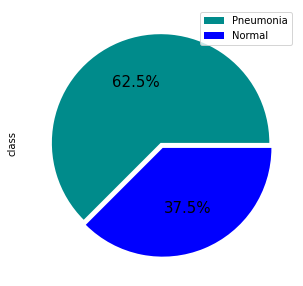

In [12]:
plt.figure(figsize=(7,5))

df_test['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

Train Set - Normal


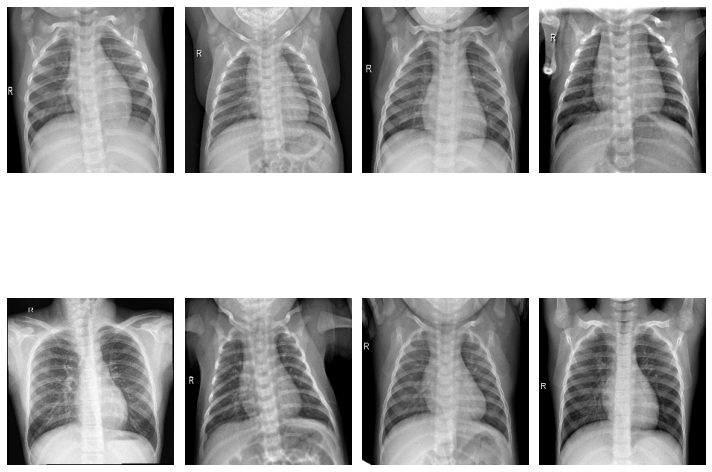

In [13]:
print('Train Set - Normal')

plt.figure(figsize=(10,10))

for i in range(0, 8):
    plt.subplot(2,4,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Set - Pneumonia


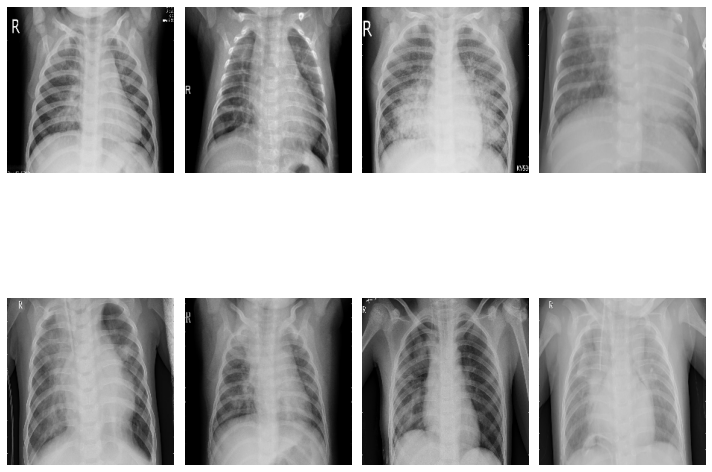

In [14]:
print('Train Set - Pneumonia')

plt.figure(figsize=(10,10))

for i in range(0, 8):
    plt.subplot(2,4,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

In [15]:
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = SEED, stratify = df_train['class'])

In [16]:
train_df

,class,image
3566,Pneumonia,../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/VIRUS-6559742-0002.jpeg
2866,Pneumonia,../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-4609274-0001.jpeg
2681,Pneumonia,../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/VIRUS-1149864-0002.jpeg
1199,Normal,../input/labeled-chest-xray-images/chest_xray/train/NORMAL/NORMAL-6315622-0002.jpeg
4619,Pneumonia,../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-1753514-0002.jpeg
...,...,...
3476,Pneumonia,../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/VIRUS-3408906-0008.jpeg
678,Normal,../input/labeled-chest-xray-images/chest_xray/train/NORMAL/NORMAL-4688588-0001.jpeg
1560,Pneumonia,../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-8467199-0001.jpeg
2769,Pneumonia,../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-6909155-0001.jpeg


In [17]:
val_df

,class,image
2945,Pneumonia,../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-2474652-0008.jpeg
4878,Pneumonia,../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-2739133-0001.jpeg
3177,Pneumonia,../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-4133607-0005.jpeg
972,Normal,../input/labeled-chest-xray-images/chest_xray/train/NORMAL/NORMAL-3476904-0001.jpeg
3059,Pneumonia,../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/VIRUS-8446214-0003.jpeg
...,...,...
253,Normal,../input/labeled-chest-xray-images/chest_xray/train/NORMAL/NORMAL-9862823-0002.jpeg
4315,Pneumonia,../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-1083680-0014.jpeg
687,Normal,../input/labeled-chest-xray-images/chest_xray/train/NORMAL/NORMAL-8991560-0001.jpeg
3417,Pneumonia,../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-7942103-0006.jpeg


In [18]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  #rotation_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             #directory=train_path, #dataframe contains the full paths
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            #directory=train_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            #directory=test_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)

Found 4185 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


In [19]:
normal = train_df[train_df['class'] == 'Normal']
num_normal = len(normal)
num_normal

1079

In [20]:
pneumonia = train_df[train_df['class'] == 'Pneumonia']
num_pneumonia = len(pneumonia)
num_pneumonia

3106

The dimensions of the image are 224 pixels width and 224 pixels height, one single color channel.
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.5047 and the standard deviation is 0.2413


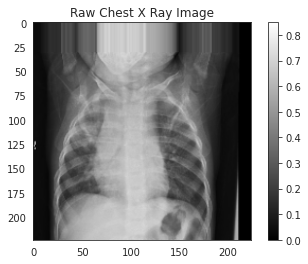

In [21]:
sns.set_style('white')
generated_image, label = ds_train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

Text(0, 0.5, '# Pixels in Image')

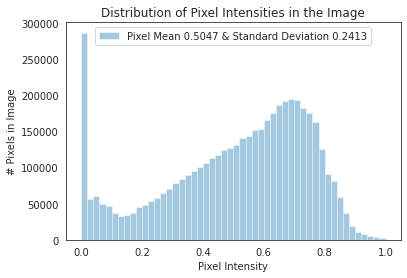

In [22]:
sns.distplot(generated_image.ravel(),
             label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", 
             kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [23]:
weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


In [24]:
from keras.models import Sequential, Model
from keras.layers import (
    Dense, Conv2D, MaxPool2D, Dropout, Flatten, 
    BatchNormalization, GlobalAveragePooling2D
)
from keras.applications.densenet import DenseNet121

In [25]:
base_model = DenseNet121(input_shape=(224, 224, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

2022-05-25 13:40:55.606403: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 13:40:55.727368: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 13:40:55.728107: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 13:40:55.729273: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

29097984/29084464 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________

In [26]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The model has 428 layers
The input shape KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
The output shape KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")


In [27]:
from keras.callbacks import ModelCheckpoint

In [56]:
DATADIR = "./"
checkpoint_p = DATADIR + "/training_6/cp-epoch-{epoch}.h5"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_p,
                                                 save_weights_only=True,
                                                 verbose=1)

In [37]:
import h5py

In [59]:
# model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
# model.add(base_model)
# model.add(GlobalAveragePooling2D())
# model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

r = model.fit(
    ds_train, 
    epochs=10,
    validation_data=ds_val,
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25
)
model.save('/kaggle/working/trial_model6.h5')

Epoch 1/10
100/100 [==============================] - 126s 820ms/step - loss: 0.0767 - accuracy: 0.9220 - val_loss: 1.5808 - val_accuracy: 0.3038
Epoch 2/10
100/100 [==============================] - 79s 794ms/step - loss: 0.0480 - accuracy: 0.9540 - val_loss: 1.1244 - val_accuracy: 0.7625
Epoch 3/10
100/100 [==============================] - 85s 855ms/step - loss: 0.0410 - accuracy: 0.9600 - val_loss: 10.3177 - val_accuracy: 0.2825
Epoch 4/10
100/100 [==============================] - 80s 801ms/step - loss: 0.0337 - accuracy: 0.9681 - val_loss: 4.9775 - val_accuracy: 0.3462
Epoch 5/10
100/100 [==============================] - 81s 806ms/step - loss: 0.0384 - accuracy: 0.9599 - val_loss: 0.0751 - val_accuracy: 0.9725
Epoch 6/10
100/100 [==============================] - 80s 795ms/step - loss: 0.0225 - accuracy: 0.9769 - val_loss: 0.1617 - val_accuracy: 0.9400
Epoch 7/10
100/100 [==============================] - 79s 790ms/step - loss: 0.0291 - accuracy: 0.9709 - val_loss: 1.8538 - val_

In [29]:
#model.load_weights('./training_1/cp-epoch-1.ckpt.data-00000-of-00001')

In [60]:
model = tf.keras.models.load_model('./trial_model6.h5')

In [61]:
evaluation = model.evaluate(ds_train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

131/131 [==============================] - 87s 652ms/step - loss: 0.1492 - accuracy: 0.9477
Train Accuracy: 94.77%


In [62]:
evaluation = model.evaluate(ds_test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 16s 26ms/step - loss: 0.2426 - accuracy: 0.9151
Test Accuracy: 91.51%


In [65]:
predicted_vals = model.predict(ds_test, steps=len(ds_test))

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
print(confusion_matrix(ds_test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(ds_test.classes, predicted_vals > 0.5, output_dict=True))

[[221  13]
 [ 40 350]]


,0,1,accuracy,macro avg,weighted avg
precision,0.846743,0.964187,0.915064,0.905465,0.920146
recall,0.944444,0.897436,0.915064,0.920940,0.915064
f1-score,0.892929,0.929615,0.915064,0.911272,0.915858
support,234.000000,390.000000,0.915064,624.000000,624.000000


In [69]:
print(confusion_matrix(ds_test.classes, predicted_vals > 0.7))
pd.DataFrame(classification_report(ds_test.classes, predicted_vals > 0.7, output_dict=True))

[[223  11]
 [ 54 336]]


,0,1,accuracy,macro avg,weighted avg
precision,0.805054,0.968300,0.895833,0.886677,0.907083
recall,0.952991,0.861538,0.895833,0.907265,0.895833
f1-score,0.872798,0.911805,0.895833,0.892302,0.897177
support,234.000000,390.000000,0.895833,624.000000,624.000000
